## Assignment:
- Build a multiple linear regression model for the prediction of demand for shared bikes

## Output : 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
day.shape

(730, 16)

In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# data cleanse and categorical value conversion

In [5]:
day_updated=day.drop(['instant', 'dteday', 'casual', 'registered', 'holiday'], axis = 1)
day_updated.season=day_updated.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day_updated

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [6]:
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

day_updated.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [7]:
day_updated.weathersit=day_updated.weathersit.map({1:'clear', 2:'cloud', 3:'snow', 4:'rain'})
day_updated.yr=day_updated.yr.map({0:'2018', 1:'2019'})
day_updated.workingday=day_updated.workingday.map({1:'Working', 0:'Holiday'})
day_updated.weekday=day_updated.weekday.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thus', 4:'Fri', 5:'Sat', 6:'Sun'})
day_updated.mnth=day_updated.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

day_updated

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Sun,Holiday,cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Mon,Holiday,cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Tue,Working,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Wed,Working,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Thus,Working,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,Fri,Working,cloud,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,Sat,Working,cloud,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,Sun,Holiday,cloud,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,Mon,Holiday,clear,10.489153,11.58500,48.3333,23.500518,1796


## Step 2: Visualising the Data

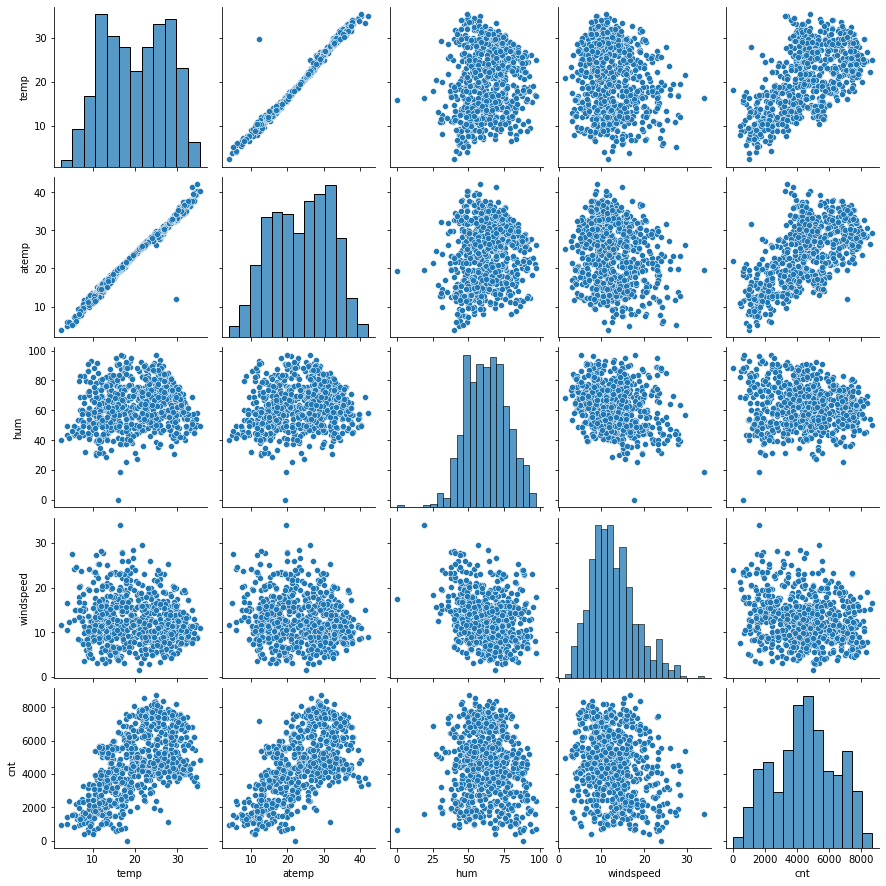

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(day_updated)
plt.show()

## Visualising Categorical Variables

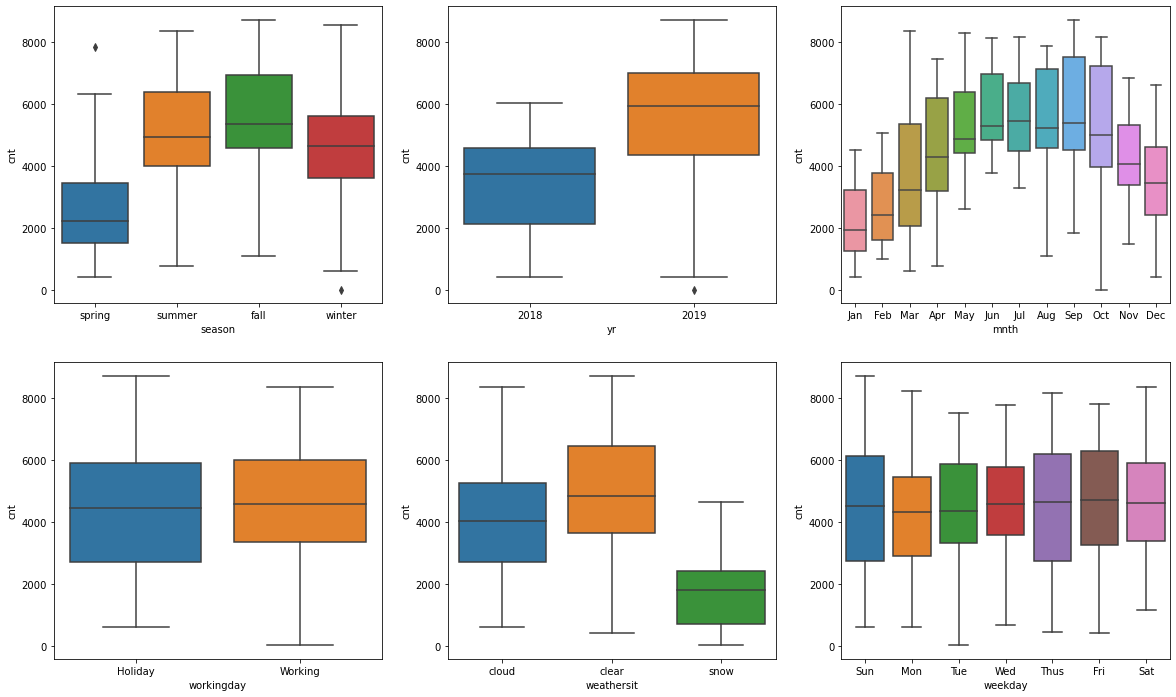

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_updated)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day_updated)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_updated)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_updated)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_updated)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_updated)
plt.show()

### Dummy Variables


Looking at the box plot few inference could be made like Weekday cnt is similar.
Working day doesnt signify much difference 
and Clearly the month and season are corelated, so ignore the month param 
So will create the Dummy value for 
#### 'season','yr','weathersit'

In [10]:

# Get the dummy variables for the feature above and store it in a new variable - 'seasons'
season_d = pd.get_dummies(day_updated['season'], drop_first = True)
yr_d = pd.get_dummies(day_updated['yr'], drop_first = True)
weathersit_d = pd.get_dummies(day_updated['weathersit'], drop_first = True)
season_d.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [11]:
yr_d.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [12]:
weathersit_d.head()

,cloud,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [13]:
# Add the results to the original housing dataframe

day_updated = pd.concat([day_updated, weathersit_d, yr_d,season_d], axis = 1)

In [14]:
# Drop'season','yr','weathersit' as we have created the dummies for it

day_updated.drop(['weathersit','yr','season', 'workingday','weekday','mnth'], axis = 1, inplace = True)

In [15]:
day_updated.head()

,temp,atemp,hum,windspeed,cnt,cloud,snow,2019,spring,summer,winter
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day_updated, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,cloud,snow,2019,spring,summer,winter
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,1
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,1,0,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,1,1,0,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,1,0


In [21]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,cloud,snow,2019,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,0.507843,0.243137,0.245098,0.24902
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,0.500429,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


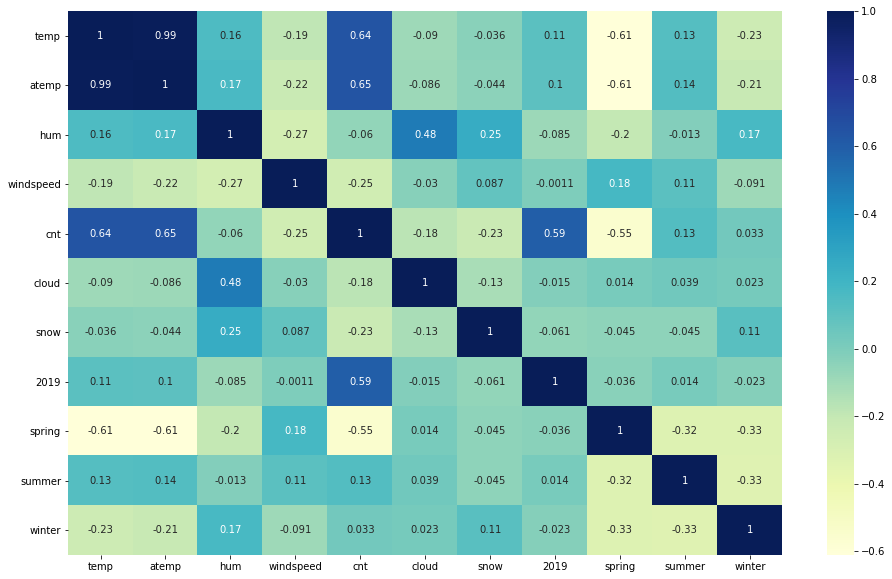

In [22]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

temp and atemp are more correlated to the cnt. Let see the pair plot for both: 

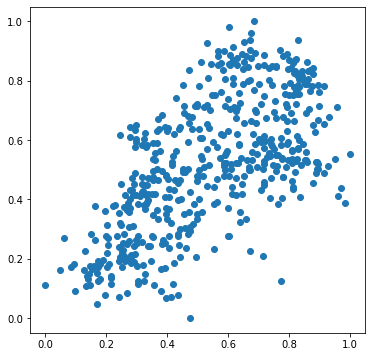

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

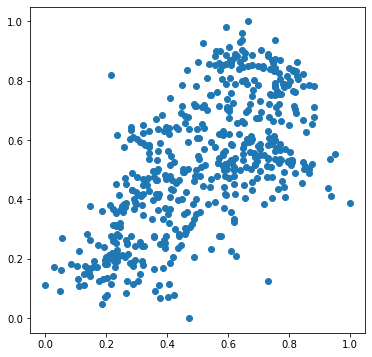

In [24]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

Lets start with temp 

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [26]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [27]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

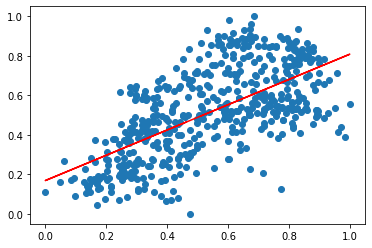

In [28]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.639*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [29]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.80e-61
Time:                        22:40:47   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

## Adding Another Variable

In [30]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'atemp']]

In [31]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
temp     0.181818
atemp    0.492316
dtype: float64

In [32]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.95e-60
Time:                        22:40:47   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

In [33]:
#### Model did not improved as the value of adjusted R-squared hasn't significantly changed

In [34]:
# Assign winter feature
X_train_lm = X_train[['temp', 'winter']]

In [35]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.120612
temp      0.684944
winter    0.100447
dtype: float64

In [36]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     207.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.87e-66
Time:                        22:40:47   Log-Likelihood:                 190.75
No. Observations:                 510   AIC:                            -375.5
Df Residuals:                     507   BIC:                            -362.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1206      0.021      5.758      0.0

In [37]:
#### Winter has increase a bit. lets add yr=2019
X_train_lm = X_train[['temp', 'winter','2019']]

In [38]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.030869
temp      0.628285
winter    0.099741
2019      0.237001
dtype: float64

In [39]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     445.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.80e-141
Time:                        22:40:47   Log-Likelihood:                 367.90
No. Observations:                 510   AIC:                            -727.8
Df Residuals:                     506   BIC:                            -710.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0309      0.015      2.012      0.0

### These parameter are significant

In [40]:
#Build a linear model for All columns

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        0.290764
temp         0.451734
atemp        0.048776
hum         -0.141282
windspeed   -0.182516
cloud       -0.052009
snow        -0.236393
2019         0.231043
spring      -0.076691
summer       0.042235
winter       0.085637
dtype: float64

In [41]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.14e-181
Time:                        22:40:47   Log-Likelihood:                 480.89
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     499   BIC:                            -893.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2908      0.036      8.091      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.



### Checking VIF

In [42]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,373.79
1,atemp,364.92
2,hum,27.04
3,windspeed,4.87
7,spring,3.76
9,winter,3.17
8,summer,2.33
4,cloud,2.27
6,2019,2.07
5,snow,1.24


Lets drop atemp as VIF is high and P-value is also high

In [44]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [45]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.20e-182
Time:                        22:40:47   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2905      0.036      8.092      0.0

In [47]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,27.00
0,temp,14.79
2,windspeed,4.64
6,spring,3.70
8,winter,3.04
3,cloud,2.27
7,summer,2.24
5,2019,2.07
4,snow,1.23


In [48]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [49]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.51e-180
Time:                        22:40:48   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2195      0.030      7.273      0.0

In [51]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.59
0,temp,3.55
4,2019,2.07
5,spring,1.94
6,summer,1.79
7,winter,1.60
2,cloud,1.52
3,snow,1.08


### Step 7: Residual Analysis of the train data

In [52]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

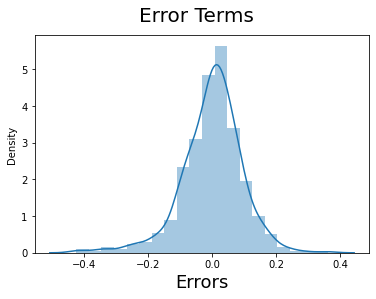

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 8: Making Predictions Using the Final Model

In [54]:
# Applying the scaling on the test sets
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,temp,atemp,hum,windspeed,cnt,cloud,snow,2019,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.319635,0.027397,0.479452,0.255708,0.264840,0.232877
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.467403,0.163612,0.500722,0.437258,0.442259,0.423633
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [57]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["atemp", "hum"], axis = 1)

In [58]:
# Making predictions using the fourth model

y_pred_m4 = lr_3.predict(X_test_m4)

## Model Evaluation 

Text(0, 0.5, 'y_pred')

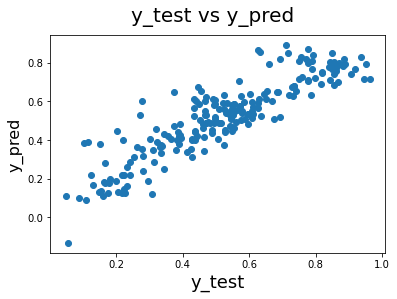

In [59]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can see that the equation of our best fitted line is:

### cnt=0.4682×temp-0.075xcloud+0.2759xsnow-0.1559xwindspeed+(0.2344xyear2019)-0.0837xspring+0.0381xsummer+0.0742xwinter+0.2195